<a href="https://colab.research.google.com/github/Qoonitah18/Project-1/blob/main/Confidence%20Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# 1. Buat data dummy
data = {
    "Nama Lokasi": ["Jakarta","Bandung","Surabaya","Medan","Jogja","Bali","Jakarta","Bandung","Surabaya","Medan"],
    "Jam Login": ["08:15","09:30","10:45","11:20","13:05","14:15","15:40","17:25","19:00","20:10"],
    "Nama": ["Andi Saputra","Siti Rahma","Budi Santoso","Rina Dewi","Agus Pratama",
             "Putri Lestari","Dwi Nugroho","Maya Sari","Rudi Hartono","Lina Putra"],
    "Email": ["andi.s@gmail.com","siti.r@yahoo.com","budi.s@gmail.com","rina.d@gmail.com",
              "agus.p@gmail.com","putri.l@gmail.com","dwi.n@gmail.com","maya.s@gmail.com",
              "rudi.h@gmail.com","lina.p@gmail.com"],
    "No Telepon": ["081234567890","082134567891","083134567892","081334567893","082234567894",
                   "083234567895","081434567896","082334567897","083334567898","081534567899"],
    "Tahun Lahir": [1998,1995,2000,1997,1999,1996,1994,2001,1998,1995],
    "Merk HP": ["Samsung","iPhone","Oppo","Xiaomi","Vivo","iPhone","Samsung","Oppo","Vivo","Xiaomi"],
    "Minat Digital": [78,85,60,92,70,88,55,65,80,73],
    "Tipe Lokasi": ["Cafe","Kantor","Mall","Rumah","Cafe","Pantai","Kantor","Mall","Cafe","Rumah"]
}

In [2]:
df = pd.DataFrame(data)
print(df)

  Nama Lokasi Jam Login           Nama              Email    No Telepon  \
0     Jakarta     08:15   Andi Saputra   andi.s@gmail.com  081234567890   
1     Bandung     09:30     Siti Rahma   siti.r@yahoo.com  082134567891   
2    Surabaya     10:45   Budi Santoso   budi.s@gmail.com  083134567892   
3       Medan     11:20      Rina Dewi   rina.d@gmail.com  081334567893   
4       Jogja     13:05   Agus Pratama   agus.p@gmail.com  082234567894   
5        Bali     14:15  Putri Lestari  putri.l@gmail.com  083234567895   
6     Jakarta     15:40    Dwi Nugroho    dwi.n@gmail.com  081434567896   
7     Bandung     17:25      Maya Sari   maya.s@gmail.com  082334567897   
8    Surabaya     19:00   Rudi Hartono   rudi.h@gmail.com  083334567898   
9       Medan     20:10     Lina Putra   lina.p@gmail.com  081534567899   

   Tahun Lahir  Merk HP  Minat Digital Tipe Lokasi  
0         1998  Samsung             78        Cafe  
1         1995   iPhone             85      Kantor  
2         2000 

In [3]:
# 2. Tambahkan variabel baru (Usia, Kategori Usia, Kategori Minat Digital)
df["Usia"] = 2025 - df["Tahun Lahir"]

df["Kategori Usia"] = pd.cut(df["Usia"],
                             bins=[0,20,35,100],
                             labels=["Remaja","Dewasa","Tua"])

df["Kategori Minat"] = pd.cut(df["Minat Digital"],
                              bins=[0,60,80,100],
                              labels=["Rendah","Sedang","Tinggi"])

In [4]:
print("Data Dummy:")
print(df)

Data Dummy:
  Nama Lokasi Jam Login           Nama              Email    No Telepon  \
0     Jakarta     08:15   Andi Saputra   andi.s@gmail.com  081234567890   
1     Bandung     09:30     Siti Rahma   siti.r@yahoo.com  082134567891   
2    Surabaya     10:45   Budi Santoso   budi.s@gmail.com  083134567892   
3       Medan     11:20      Rina Dewi   rina.d@gmail.com  081334567893   
4       Jogja     13:05   Agus Pratama   agus.p@gmail.com  082234567894   
5        Bali     14:15  Putri Lestari  putri.l@gmail.com  083234567895   
6     Jakarta     15:40    Dwi Nugroho    dwi.n@gmail.com  081434567896   
7     Bandung     17:25      Maya Sari   maya.s@gmail.com  082334567897   
8    Surabaya     19:00   Rudi Hartono   rudi.h@gmail.com  083334567898   
9       Medan     20:10     Lina Putra   lina.p@gmail.com  081534567899   

   Tahun Lahir  Merk HP  Minat Digital Tipe Lokasi  Usia Kategori Usia  \
0         1998  Samsung             78        Cafe    27        Dewasa   
1         1995

In [9]:
# 3. Confidence Interval untuk rata-rata usia
usia = df["Usia"]
mean = np.mean(usia)
std = np.std(usia, ddof=1)   # sample standard deviation
n = len(usia)
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, n-1)
se = std / np.sqrt(n)
ci_lower = mean - t_value * se
ci_upper = mean + t_value * se

print("\nRata-rata Usia:", round(mean,2))
print(f"95% Confidence Interval: [{round(ci_lower,2)} , {round(ci_upper,2)}]")


Rata-rata Usia: 27.7
95% Confidence Interval: [26.05 , 29.35]


In [7]:
import matplotlib.pyplot as plt

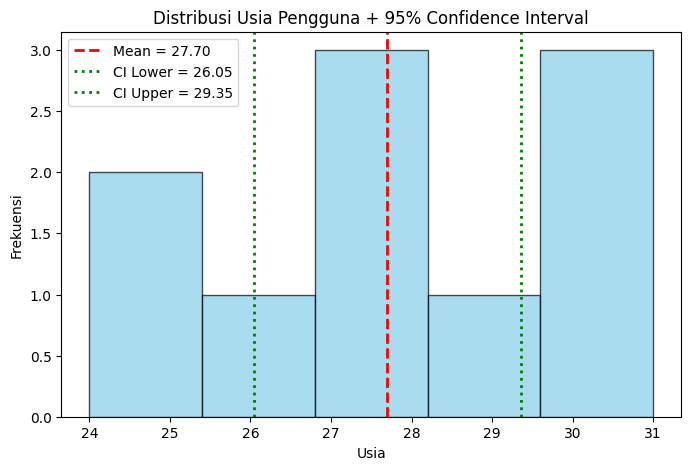

In [10]:
# 4. Visualisasi histogram usia dengan CI
plt.figure(figsize=(8,5))
plt.hist(usia, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axvline(ci_lower, color='green', linestyle='dotted', linewidth=2, label=f'CI Lower = {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle='dotted', linewidth=2, label=f'CI Upper = {ci_upper:.2f}')

plt.title("Distribusi Usia Pengguna + 95% Confidence Interval")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

In [6]:
# 3. Rata-rata skor minat digital
skor = df["Minat Digital"]
mean = np.mean(skor)

print("\nRata-rata Skor:", round(mean,2))


Rata-rata Skor: 74.6
